# Exploratory Data Analysis

Here, we will take a look at the data set and what are the insighits that we can get of it

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

/home/ahmed/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('./data/cardiovascular_raw_dataset.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0
1,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0
2,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1
3,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
4,51,M,ASY,120,0,1,Normal,104,N,0.0,Flat,1


### Ambiguous Columns Meaning

- RestingBP -> Resting Blood Presure
- FastingBS -> Fasting Blood Sugar
- RestingECG -> Resting Electrocardiography (heart waves ploting)
- MaxHR -> Max Heart Rate
- ExcerciseAngine -> Angine is a sever pain in chest
- OldPeak -> ST depression induced by exercise relative to rest

### The Target in this dataset is the ***HeartDisease*** column

## Gathering info about the dataset 

In [3]:
print(df.shape)
print('-' * 20)
df.info()

(734, 12)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.9+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.651226,133.064033,199.683924,0.227520,136.178474,0.905041,0.546322
std,9.364290,18.438941,108.216855,0.419517,25.329254,1.082952,0.498189
min,29.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,177.000000,0.000000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,269.000000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Insights:
- There are no null values in the dataset
- Many of our features are categorical
- The target itself is categorical (0, 1)

### Lets separate the categorical and numerical features to get more insights

In [5]:
print(df['HeartDisease'].unique())
print(df['FastingBS'].unique())

[0 1]
[1 0]


Before the separation, we can note that although both *HeartDisease*  
and *FastingBS* are numerical values, they correspond to only two categories each,  
so we will include them in the categorical data

In [6]:
df_cat = df.select_dtypes(include=['O'])
df_cat = pd.concat([df_cat, df[['FastingBS', 'HeartDisease']]], axis = 1)
df_cat.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,FastingBS,HeartDisease
0,M,NAP,Normal,N,Down,1,0
1,M,NAP,Normal,N,Up,0,0
2,M,ASY,Normal,Y,Flat,1,1
3,F,NAP,Normal,N,Up,0,0
4,M,ASY,Normal,N,Flat,1,1


In [7]:
df_num = df.select_dtypes(exclude=['O'])
df_num = df_num.drop(columns=['FastingBS', 'HeartDisease'])
df_num.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,42,120,240,194,0.8
1,36,130,209,178,0.0
2,56,150,213,125,1.0
3,37,130,211,142,0.0
4,51,120,0,104,0.0


### Lets Start with the categorical

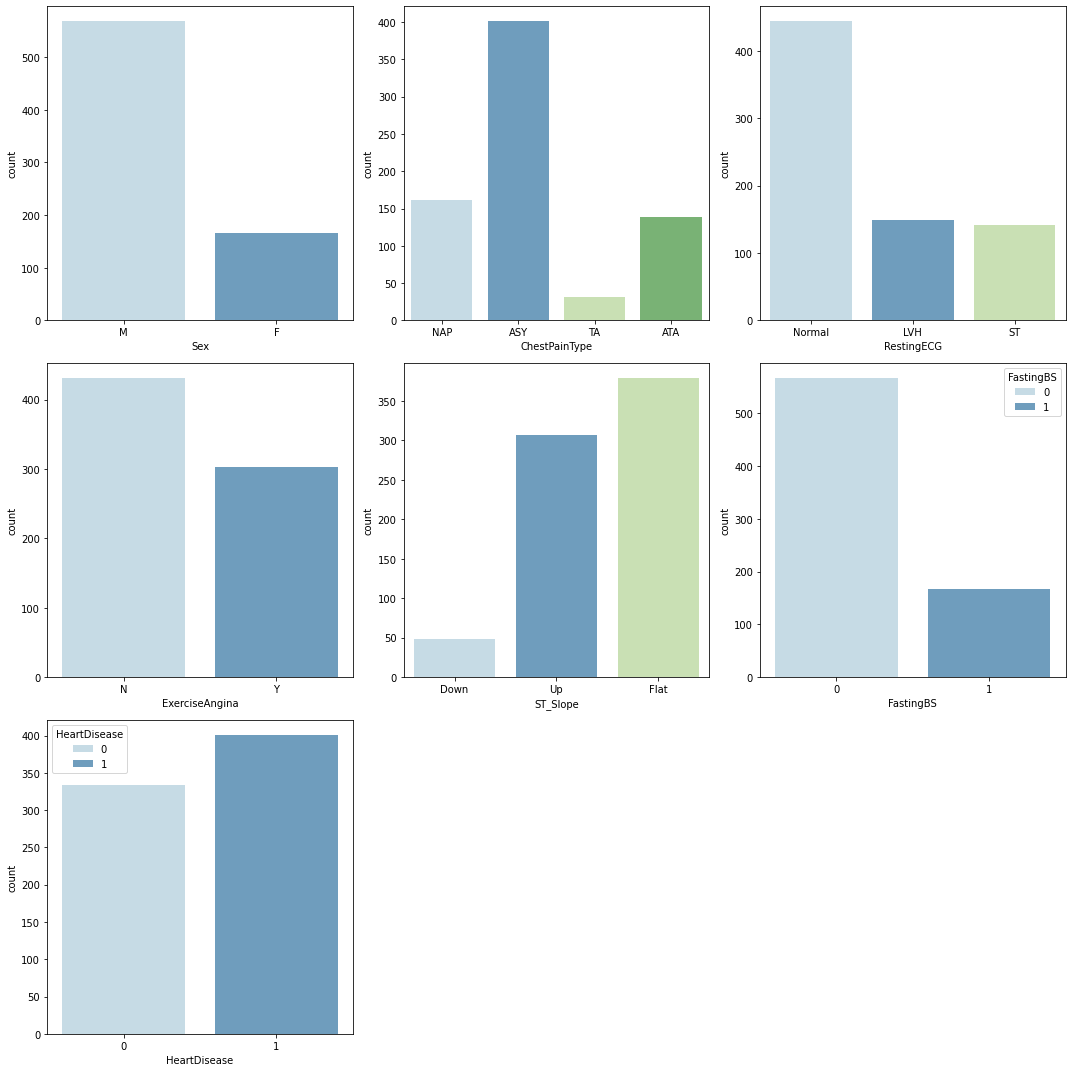

In [8]:
_, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False, sharey=False)
# axes: a 2D array of 9 subplots

for i, ax in enumerate(axes.flatten()):
    if i < 7: # define what each subplot is, and give is a title
        sb.countplot(x=df_cat.columns[i], data=df_cat, ax=ax, alpha=0.7, palette='Paired', hue=df_cat.columns[i])
    else: # make the remining plots invisible
        ax.set_visible(False)

plt.tight_layout()
plt.show()

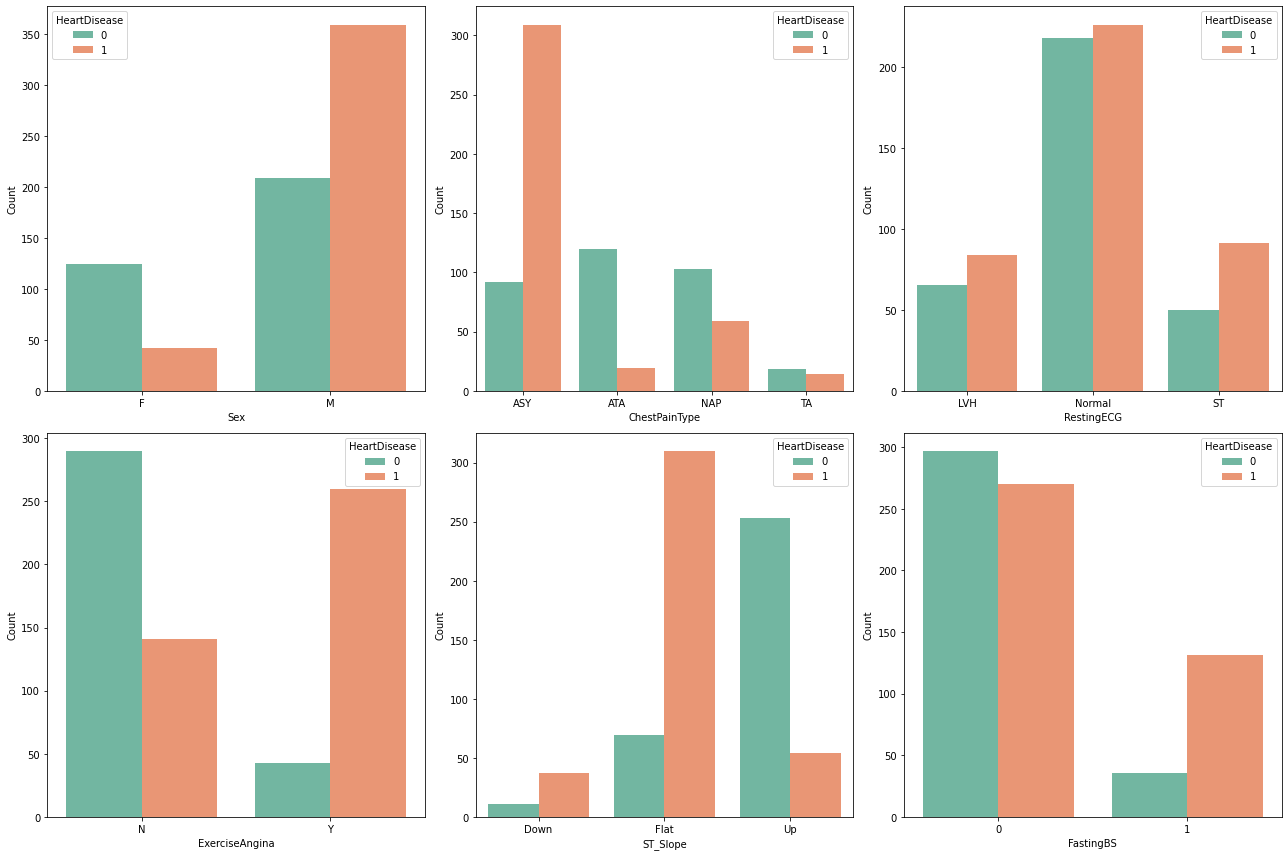

In [9]:
_, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=False, sharey=False)
# axes: a 2D array of 6 subplots

for i, ax in enumerate(axes.flatten()):
    # definge a grouped data frame to be able to know how much each category
    # of the categorical columns contribute to the categories of the 
    # target column
    grouped_df = df_cat.groupby([df_cat.columns[i], 'HeartDisease']).size().reset_index(name='Count')
    # Plot the clustered bar plot
    sb.barplot(x=df_cat.columns[i], y='Count', hue='HeartDisease', data=grouped_df, palette='Set2', ax=ax)
    ax.set_xlabel(df_cat.columns[i])
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

### Insight:
- From the graphs above, we can consider that the  
    categorical data has a fairly decent distribution.

### What is the association between each of the Categorical Features and the Target?

In [26]:
# Get the chi2 score
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# First encode the data using LabelEncoder
X_cat = df[[*(df_cat.columns.tolist())]].apply(LabelEncoder().fit_transform)
X_cat.head()

# Get the scores
chi2_scores, p_values = chi2(X_cat, df['HeartDisease'])
chi2_scores = dict(zip(df_cat.columns.tolist(), chi2_scores))

# Sort them in descending order
chi2_scores = dict(sorted(chi2_scores.items(), key = lambda item: item[1], reverse=True))

for key, val in chi2_scores.items():
  print(f"{key}: {val}")

HeartDisease: 332.99999999999994
ExerciseAngina: 118.82254761613294
ChestPainType: 115.30357880755145
ST_Slope: 62.97583840253603
FastingBS: 38.20092147039747
Sex: 16.83928111666862
RestingECG: 0.7185078774287583


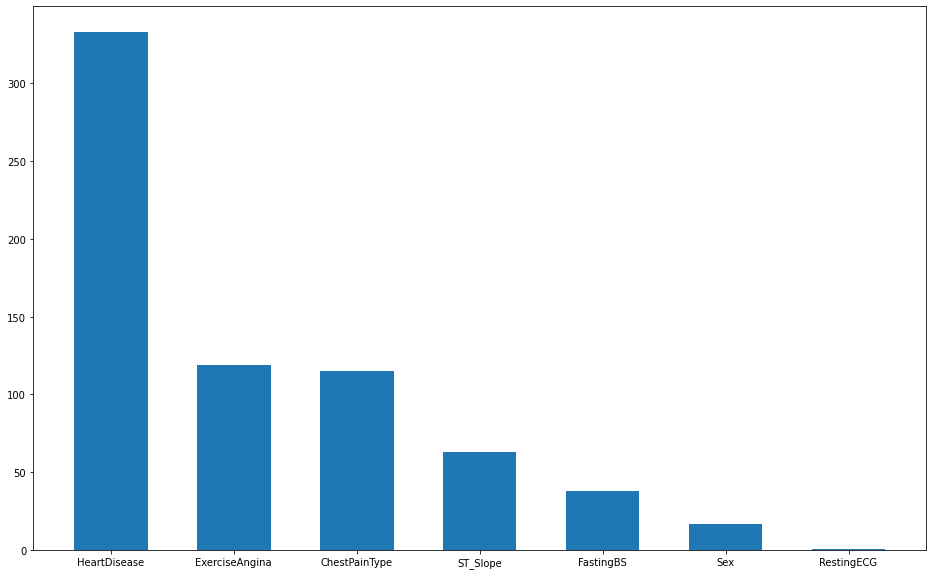

In [27]:
# Plot he Chi-Square test scores for better visualization
plt.figure(figsize=(16, 10))
plt.bar(chi2_scores.keys(), chi2_scores.values(), width= 0.6)
plt.show()

### Insights:
- The Chi-Square value for **RestingECG** is vary low indicating no relation with the target  
  (column will be removed in the Data Preprocessing Stage)

- Of course **HeartDisease** has the greatest value  
  (Relation with itself)

## Now, with the numerical data

In [10]:
df_num.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,42,120,240,194,0.8
1,36,130,209,178,0.0
2,56,150,213,125,1.0
3,37,130,211,142,0.0
4,51,120,0,104,0.0


In [11]:
df_num.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.651226,133.064033,199.683924,136.178474,0.905041
std,9.364290,18.438941,108.216855,25.329254,1.082952
min,29.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,177.000000,118.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,269.000000,155.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


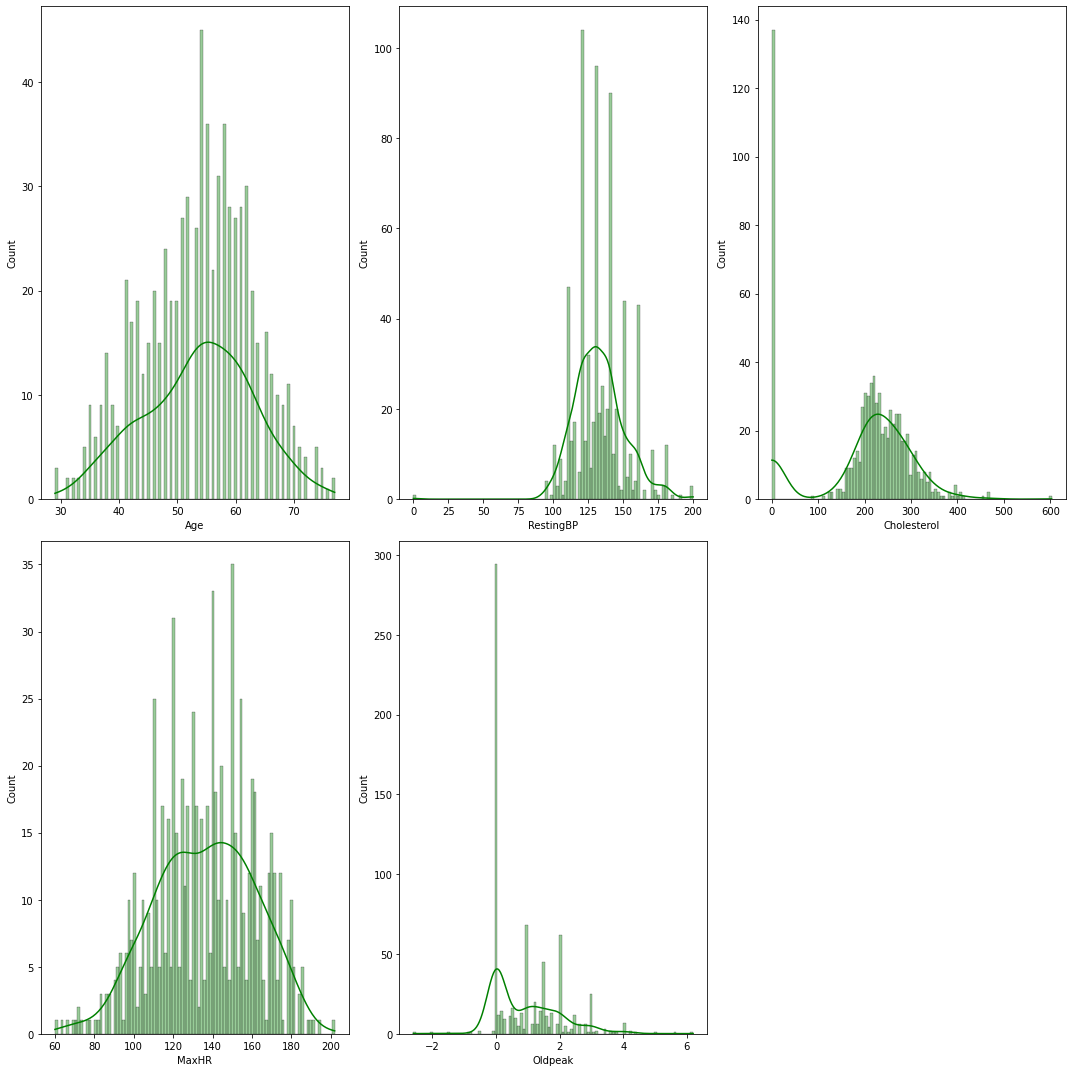

In [12]:
_, axes = plt.subplots(2, 3, figsize=(15, 15), sharex=False, sharey=False)
# axes: a 2D array of 6 subplots

for i, ax in enumerate(axes.flatten()):
    if i < 5: # define what each subplot is, and give is a title
        sb.histplot(df_num.iloc[:, i], color='g', bins=100, kde=True, ax=ax, alpha=0.4)
    else: # make the 6th plot invisible
        ax.set_visible(False)

plt.tight_layout()
plt.show()

### Insights:
- The numerical data tend to have a **normal** distribution
- Both **Cholesterol** and **Oldpeak** hava a lot of zeros  
    which could mean the lack of these data for those individuals  
    (we will deal with this in the preprocessing stage)

## How much does the Numerical features contribute to having a HeartDisease?

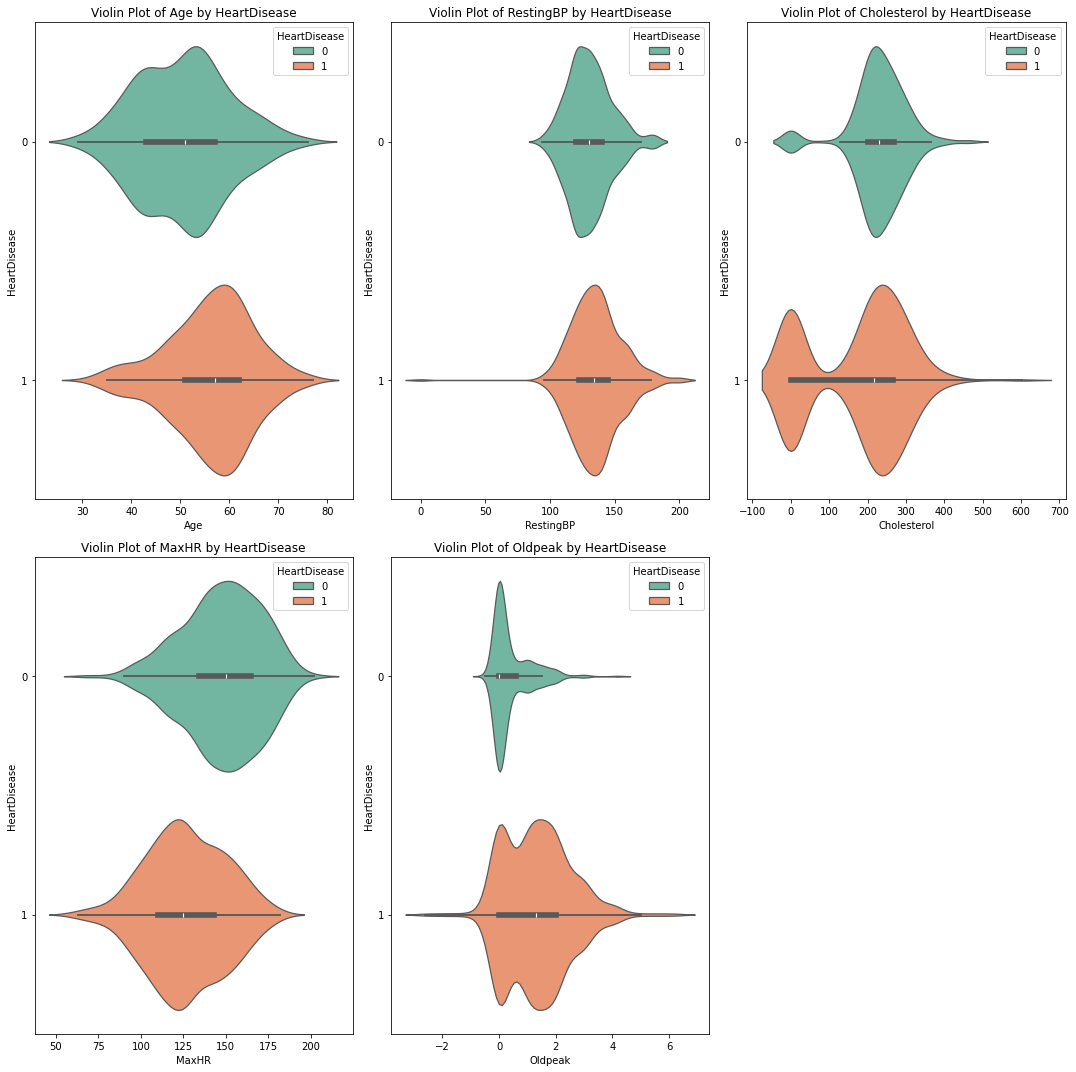

In [13]:
target_column = 'HeartDisease'

_, axes = plt.subplots(2, 3, figsize=(15, 15), sharex=False, sharey=False)
# axes: a 2D array of 6 subplots

for i, ax in enumerate(axes.flatten()):
    if i < 5: # define what each subplot is, and give is a title
        # I found that amoung violin, swarm, and strip plots, the violin would have the best visualization
        sb.violinplot(x=df_num.columns[i], y=target_column, data=df, palette='Set2', hue=target_column, orient='h', ax=ax)
        ax.set_title(f'Violin Plot of {df_num.columns[i]} by {target_column}')
    else: # make the 6th plot invisible
        ax.set_visible(False)

plt.tight_layout()
plt.show()

In [14]:
print(len(df[df['RestingBP'] < 80]))
print(len(df[(df['Cholesterol'] > 460)]))
print(len(df[(df['Oldpeak'] < 0)]), len(df[(df['Oldpeak'] >= 5)]))

1
3
9 3


### Insights: from both the Histplot and the Violin
**RestingBP**, **Cholesterol**, and **OldPeak** have got a low number  
of *outliers* that constitue 2.2% of the dataset, so they can be **safely** removed

## Numerical data Correlation

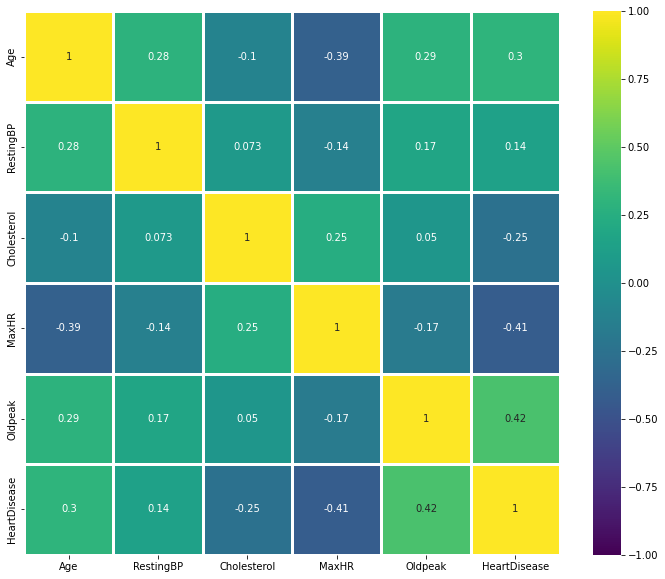

In [17]:
plt.figure(figsize=(12, 10))
corr = df[[*(df_num.columns.tolist()), 'HeartDisease']].corr()

sb.heatmap(corr, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=3, annot=True);

### Insight:

- There is no real correlation between between any of the numerical features

- **RestingBP** show very weak correlation with the target indicating no linear relation  
  (Better be removed in the Data Preprocessing Stage)